In [2]:
import torch
import torchvision
import numpy as np
from torchsummary import summary
from torch.utils.data import DataLoader
from torchvision import transforms
import sys

sys.path.append("/workspaces/ood/")


from ood.train import train_linear
from ood.eval import accuracy
from ood.train import init_linear_train
from ood.draw import draw_score_distr_plot
from ood.ood_metrics import get_measures
from ood.utils import prettify_value

import warnings

warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2
device = torch.device("cuda")
torch.cuda.is_available()

True

# Cross Entropy ImageNet pretrain

### 1) Load data

In [2]:
# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# transform = transforms.Compose(
#     [
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         normalize,
#     ]
# )

In [3]:
# cifar_data_train = torchvision.datasets.CIFAR10(
#     "../data/cifar10", download=False, transform=transform
# )
# cifar_data_test = torchvision.datasets.CIFAR10(
#     "../data/cifar10", download=False, transform=transform, train=False
# )

# svhn_data_train = torchvision.datasets.SVHN(
#     "../data/svhn", download=False, transform=transform
# )
# svhn_data_test = torchvision.datasets.SVHN(
#     "../data/svhn", download=False, transform=transform, split="test"
# )

### 2) Load model

In [9]:
# soft_model = torchvision.models.resnet50(pretrained=False).to(device)
# soft_model.load_state_dict(
#     torch.load(
#         "/workspaces/ood/data/models/torch/hub/checkpoints/resnet50-0676ba61.pth"
#     )
# )
# summary(soft_model, input_size=(3, 224, 224))

### 3) Make sanity check prediction

In [5]:
# from ood.utils import imagenet_sanity_check

# imagenet_sanity_check(soft_model, transform, device)

### 4) Predict on whole datasets

In [6]:
# from ood.utils import add_labels, predict_on_whole_dataset
# predict_on_whole_dataset(soft_model, cifar_data_train, 'soft_cifar_train')

# #add labels to file along with emb
# cifar_data_train = torchvision.datasets.CIFAR10('../data/cifar10', download=False)
# add_labels(cifar_data_train, 'soft_cifar_train')

### 5) Train linear classification model on soft embeddings of Cifar 10

In [7]:
# model_name = 'soft'

# linear_model, train_dataloader, val_dataloader, optimizer, criterion, scheduler = init_linear_train(
#         in_distr_train_path=f'../data/predictions/{model_name}_cifar_train.npy',
#         in_distr_val_path=f'../data/predictions/{model_name}_cifar_test.npy',
#         emb_size=1000,
#         num_classes=10,
#         init_lr=1e-4,
#         lr_step_size=20,
#         lr_gamma=0.5,
#         weight_decay=1e-6,
#         batch_size=512,
#         device=device
# )
# train(train_dataloader, val_dataloader,
#         linear_model, optimizer, scheduler,
#         criterion, accuracy,
#         train_epoch=200, metric_freq=1500, device=device)

In [8]:
# torch.save(linear_model.state_dict(), f'../data/trained_models/soft_cifar_linear_model0.88test_accuracy.pth')

### 6) Perform out of distribution detection

In [9]:
from ood.ood_detection import compute_softmax_and_energy

model_name = "soft"
softmax_scores_distr, energy_scores_distr = compute_softmax_and_energy(
    linear_model_path="../data/trained_models/soft_cifar_linear_model0.8800test_accuracy.pth",
    emb_size=1000,
    num_classes=10,
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    device=device,
)

Linear model in distribution test accuracy: 0.88040
Computing softmax and energy scores...


100%|██████████| 26032/26032 [00:05<00:00, 4967.64it/s]


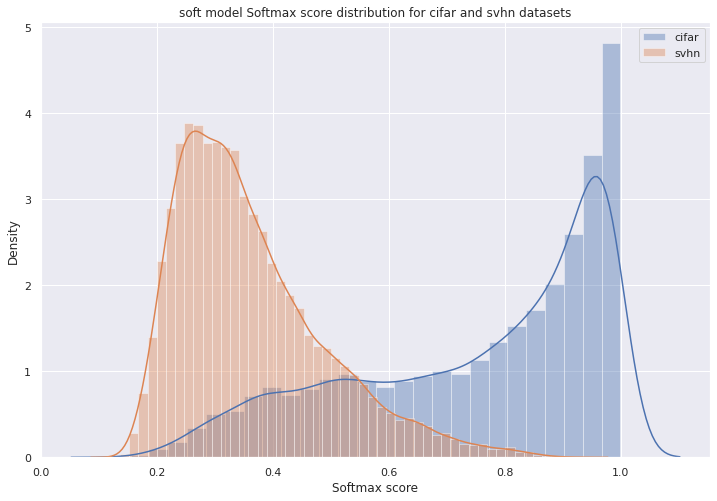

In [10]:
draw_score_distr_plot(
    scores_distr=softmax_scores_distr,
    score_type="Softmax",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

In [11]:
auroc, aupr, fpr = get_measures(
    softmax_scores_distr["cifar"], softmax_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 soft softmax scores: 
 auroc 0.91962
 aupr  0.87665
 FPR95 0.46869


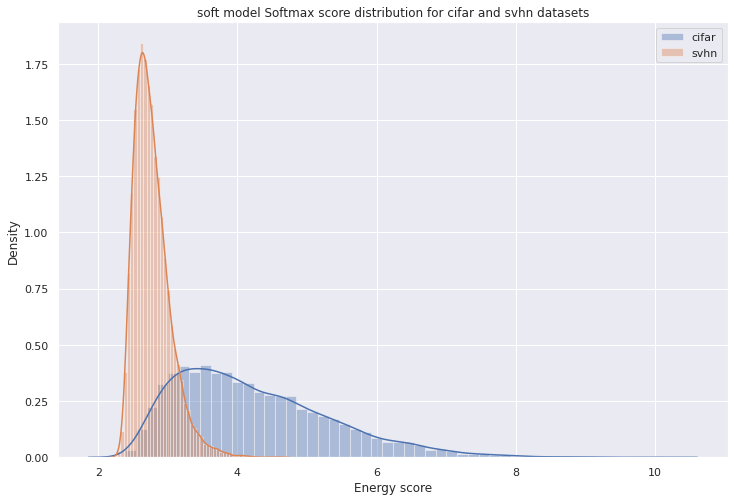

In [12]:
draw_score_distr_plot(
    scores_distr=energy_scores_distr,
    score_type="Energy",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

In [13]:
auroc, aupr, fpr = get_measures(
    energy_scores_distr["cifar"], energy_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} energy scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 soft energy scores: 
 auroc 0.94235
 aupr  0.90845
 FPR95 0.36144


# MoCo v2 ImageNet pretrain

### 1) Load model

In [14]:
# from ood.utils import load_moco

# model = load_moco('/workspaces/ood/data/models/moco_v2_800ep_pretrain.pth.tar', device)

### 2) Predict on whole datasets

In [15]:
# from ood.utils import add_labels, predict_on_whole_dataset_moco

# predict_on_whole_dataset_moco(model, cifar_data_test, 'moco_cifar_test', device)
# predict_on_whole_dataset_moco(model, cifar_data_train, 'moco_cifar_train', device)
# predict_on_whole_dataset_moco(model, svhn_data_train, 'moco_svhn_train', device)
# predict_on_whole_dataset_moco(model, svhn_data_test, 'moco_svhn_test', device)

### 3) Train linear classification model on soft embeddings of Cifar 10

In [16]:
# model_name = 'moco'

# linear_model, train_dataloader, val_dataloader, optimizer, criterion, scheduler = init_linear_train(
#         in_distr_train_path=f'../data/predictions/{model_name}_cifar_train.npy',
#         in_distr_val_path=f'../data/predictions/{model_name}_cifar_test.npy',
#         emb_size=2048,
#         num_classes=10,
#         init_lr=1e-4,
#         lr_step_size=20,
#         lr_gamma=0.5,
#         weight_decay=1e-6,
#         batch_size=512,
#         device=device
# )
# train(train_dataloader, val_dataloader,
#         linear_model, optimizer, scheduler,
#         criterion, accuracy,
#         train_epoch=200, metric_freq=1500, device=device)

In [17]:
# torch.save(soft_cifar_linear_model.state_dict(), f'../data/trained_models/moco_cifar_linear_model0.8382test_accuracy.pth')

### 4) Perform out of distribution detection

In [18]:
from ood.ood_detection import compute_softmax_and_energy

model_name = "moco"
softmax_scores_distr, energy_scores_distr = compute_softmax_and_energy(
    linear_model_path="../data/trained_models/moco_cifar_linear_model0.8382test_accuracy.pth",
    emb_size=2048,
    num_classes=10,
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    device=device,
)

Linear model in distribution test accuracy: 0.83830
Computing softmax and energy scores...


100%|██████████| 26032/26032 [00:04<00:00, 5304.04it/s]


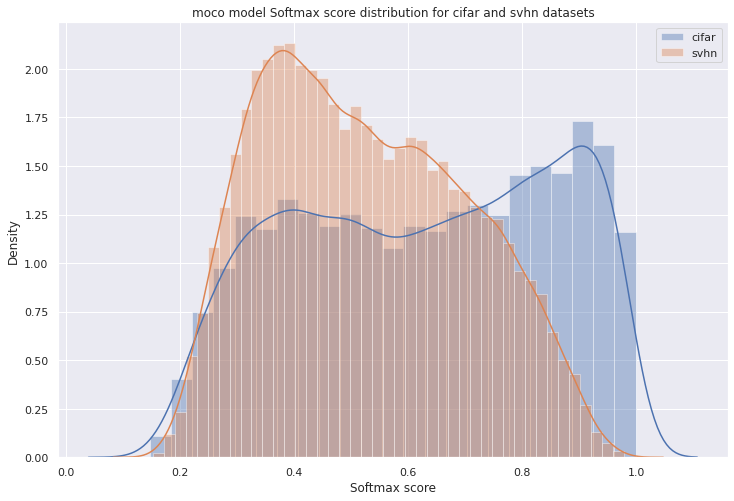

In [19]:
draw_score_distr_plot(
    scores_distr=softmax_scores_distr,
    score_type="Softmax",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

In [20]:
auroc, aupr, fpr = get_measures(
    softmax_scores_distr["cifar"], softmax_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 moco softmax scores: 
 auroc 0.63452
 aupr  0.50252
 FPR95 0.95386


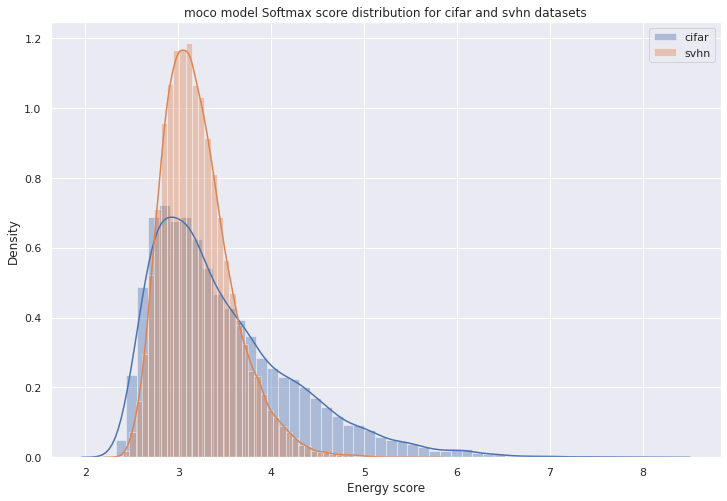

In [21]:
draw_score_distr_plot(
    scores_distr=energy_scores_distr,
    score_type="Energy",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

In [22]:
auroc, aupr, fpr = get_measures(
    energy_scores_distr["cifar"], energy_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} energy scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 moco energy scores: 
 auroc 0.57447
 aupr  0.47079
 FPR95 0.98609


# BYOL ImageNet pretrain

### 1) Load model

In [23]:
# from ood.utils import load_byol
# model = load_byol('/workspaces/ood/data/models/pretrain_res50x1.pth.tar', device)

### 2) Predict

In [24]:
# model_name = 'byol'
# predict_on_whole_dataset(model, cifar_data_test, f'{model_name}_cifar_test', device)
# predict_on_whole_dataset(model, cifar_data_train, f'{model_name}_cifar_train', device)
# predict_on_whole_dataset(model, svhn_data_train, f'{model_name}_svhn_train', device)
# predict_on_whole_dataset(model, svhn_data_test, f'{model_name}_svhn_test', device)

### 3) Train linear classification model on soft embeddings of Cifar 10

In [25]:
# model_name = 'byol'

# linear_model, train_dataloader, val_dataloader, optimizer, criterion, scheduler = init_linear_train(
#         in_distr_train_path=f'../data/predictions/{model_name}_cifar_train.npy',
#         in_distr_val_path=f'../data/predictions/{model_name}_cifar_test.npy',
#         emb_size=2048,
#         num_classes=10,
#         init_lr=1e-4,
#         lr_step_size=20,
#         lr_gamma=0.5,
#         weight_decay=1e-6,
#         batch_size=512,
#         device=device
# )
# train(train_dataloader, val_dataloader,
#         linear_model, optimizer, scheduler,
#         criterion, accuracy,
#         train_epoch=200, metric_freq=1500, device=device)

In [26]:
# torch.save(cifar_linear_model.state_dict(), f'../data/trained_models/{model_name}_cifar_linear_model0.905test_accuracy.pth')

### 4) Perform out of distribution detection

In [27]:
from ood.ood_detection import compute_softmax_and_energy

model_name = "byol"
softmax_scores_distr, energy_scores_distr = compute_softmax_and_energy(
    linear_model_path=f"../data/trained_models/{model_name}_cifar_linear_model0.905test_accuracy.pth",
    emb_size=2048,
    num_classes=10,
    in_distr_test_path=f"../data/predictions/{model_name}_cifar_test.npy",
    out_distr_test_path=f"../data/predictions/{model_name}_svhn_test.npy",
    in_distr_ds_name="cifar",
    out_distr_ds_name="svhn",
    device=device,
)

Linear model in distribution test accuracy: 0.90480
Computing softmax and energy scores...


100%|██████████| 26032/26032 [00:05<00:00, 5152.30it/s]


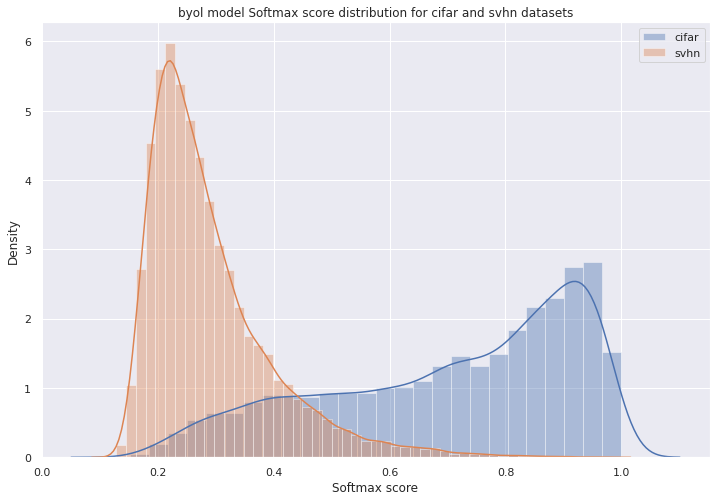

In [28]:
draw_score_distr_plot(
    scores_distr=softmax_scores_distr,
    score_type="Softmax",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

In [29]:
auroc, aupr, fpr = get_measures(
    softmax_scores_distr["cifar"], softmax_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} softmax scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 byol softmax scores: 
 auroc 0.94404
 aupr  0.90462
 FPR95 0.33443


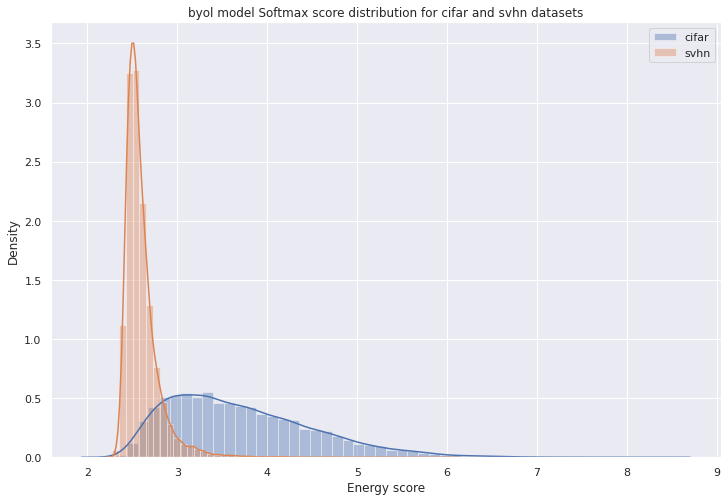

In [30]:
draw_score_distr_plot(
    scores_distr=energy_scores_distr,
    score_type="Energy",
    model_name=model_name,
    in_data_name="cifar",
    out_data_name="svhn",
)

In [31]:
auroc, aupr, fpr = get_measures(
    energy_scores_distr["cifar"], energy_scores_distr["svhn"]
)
auroc, aupr, fpr = prettify_value((auroc, aupr, fpr), num_round=5, ljust_num=7)

print(f" {model_name} energy scores: \n auroc {auroc}\n aupr  {aupr}\n FPR95 {fpr}")

 byol energy scores: 
 auroc 0.95593
 aupr  0.91585
 FPR95 0.23698
